# IoT Temperature and Humidity Data
### A simple data ingestion, transformation and visualization

Here we consume an exported static JSON data collection from firebase. 
Firstly we need to clean the data and then transform to a point where we can create visualizations using seaborn.

#### By Azaz Ahamed


In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
with open('iot-001-241915-export.json') as f:
    d = json.load(f)

In [6]:
type(d)

dict

In [18]:
pd.DataFrame(d['devices-telemetry']['esp32_D05D44']).transpose()

,humidity,temperature,timestamp
-Lg3ot70gf93wvy8CmEu,76,32.4,2019-05-29T18:21:42.166Z
-Lg3p2vlksJu-TlslsxW,76,32.4,2019-05-29T18:21:57.153Z
-Lg3p2vpY5djsg8buwkV,76,32.3,2019-05-29T18:21:52.160Z
-Lg3p309F2DN6LI_4Drb,76,32.3,2019-05-29T18:22:02.163Z
-Lg3p30P5xE4FcM_vf4x,76,32.4,2019-05-29T18:22:07.157Z
...,...,...,...
-Lz_HutKh_EmAOQjstYH,74,21.6,2020-01-27T04:38:59.592Z
-Lz_I8Xo_mZZNJAs73cN,74,21.5,2020-01-27T04:39:59.588Z
-Lz_INCwpFqr9ivQddZy,74,21.5,2020-01-27T04:40:59.714Z
-Lz_IarQdu31eaRE0N86,74,21.5,2020-01-27T04:41:59.590Z


,0
-Lg3ot70gf93wvy8CmEu.humidity,76
-Lg3ot70gf93wvy8CmEu.temperature,32.4
-Lg3ot70gf93wvy8CmEu.timestamp,2019-05-29T18:21:42.166Z
-Lg3p2vlksJu-TlslsxW.humidity,76
-Lg3p2vlksJu-TlslsxW.temperature,32.4
...,...
-Lz_IarQdu31eaRE0N86.temperature,21.5
-Lz_IarQdu31eaRE0N86.timestamp,2020-01-27T04:41:59.590Z
-Lz_IpVvls0cw5j6Oo4H.humidity,74
-Lz_IpVvls0cw5j6Oo4H.temperature,21.6


In [38]:
store = d['devices-telemetry']['esp32_D05D44']

In [40]:
df = pd.DataFrame(store)

In [46]:
df = df.transpose()

In [56]:
df.reset_index(inplace=True)

In [63]:
df.drop(['index'], axis=1, inplace=True)

In [64]:
df

,humidity,temperature,timestamp
0,76,32.4,2019-05-29T18:21:42.166Z
1,76,32.4,2019-05-29T18:21:57.153Z
2,76,32.3,2019-05-29T18:21:52.160Z
3,76,32.3,2019-05-29T18:22:02.163Z
4,76,32.4,2019-05-29T18:22:07.157Z
...,...,...,...
18140,74,21.6,2020-01-27T04:38:59.592Z
18141,74,21.5,2020-01-27T04:39:59.588Z
18142,74,21.5,2020-01-27T04:40:59.714Z
18143,74,21.5,2020-01-27T04:41:59.590Z


In [68]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [79]:
df['Month'] = df['timestamp'].apply(lambda m: m.month)

In [98]:
df

,humidity,temperature,timestamp,Month,Date
0,76,32.4,2019-05-29 18:21:42.166000+00:00,5,2019-05-29
1,76,32.4,2019-05-29 18:21:57.153000+00:00,5,2019-05-29
2,76,32.3,2019-05-29 18:21:52.160000+00:00,5,2019-05-29
3,76,32.3,2019-05-29 18:22:02.163000+00:00,5,2019-05-29
4,76,32.4,2019-05-29 18:22:07.157000+00:00,5,2019-05-29
...,...,...,...,...,...
18140,74,21.6,2020-01-27 04:38:59.592000+00:00,1,2020-01-27
18141,74,21.5,2020-01-27 04:39:59.588000+00:00,1,2020-01-27
18142,74,21.5,2020-01-27 04:40:59.714000+00:00,1,2020-01-27
18143,74,21.5,2020-01-27 04:41:59.590000+00:00,1,2020-01-27


In [97]:
df['temperature'] = df['temperature'].apply(lambda t : float(t))
df['Date'] = df['timestamp'].apply(lambda x : x.date())

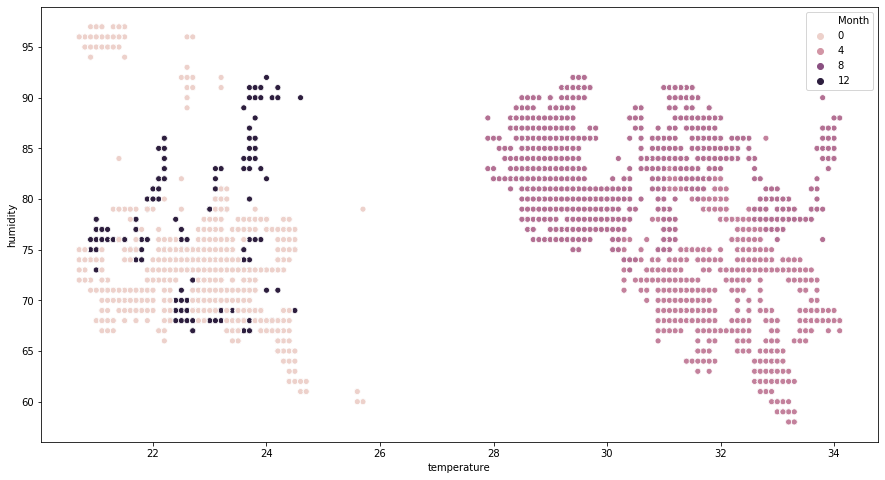

In [104]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['temperature'], y=df['humidity'], hue=df['Month'])

In [105]:
df['Month'].unique()

array([ 5,  6, 12,  1], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


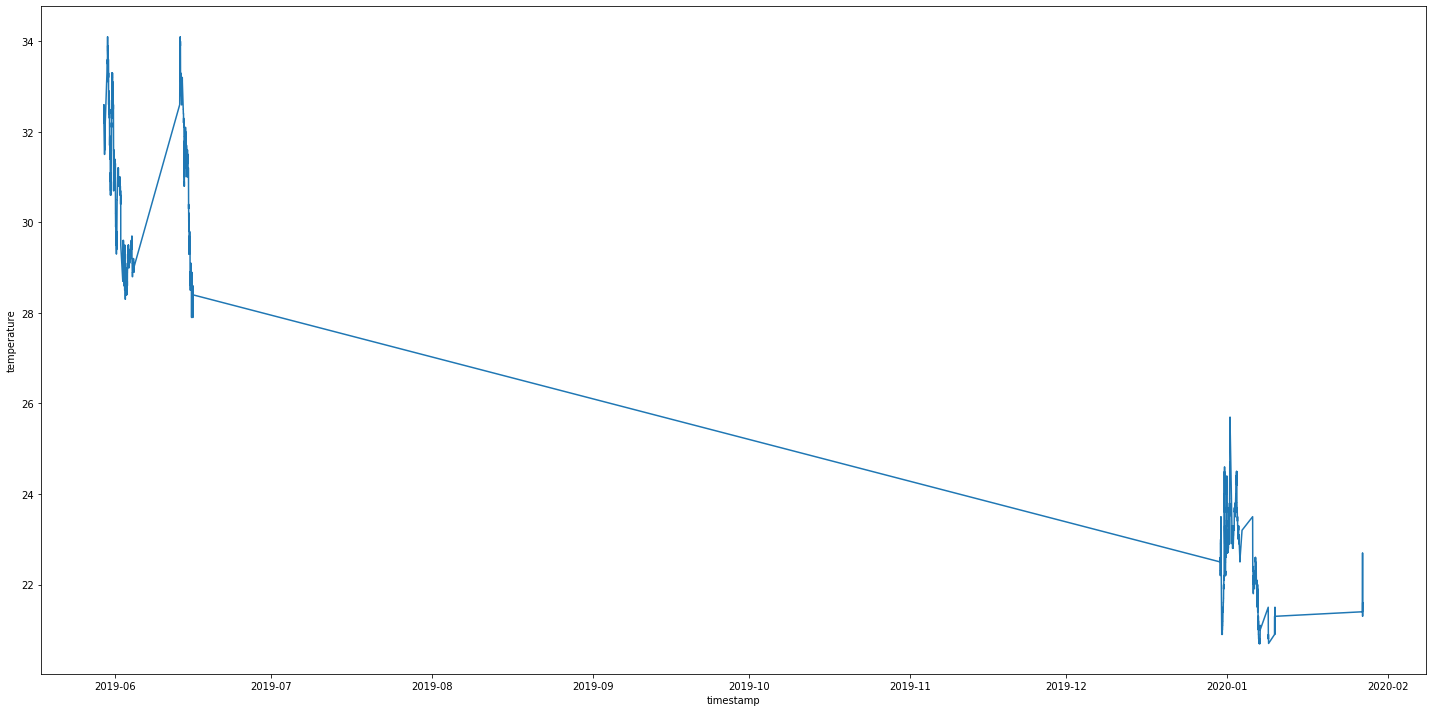

In [124]:
plt.figure(figsize=(20,10))
sns.lineplot(x='timestamp', y='temperature', data=df)
plt.tight_layout()